<a href="https://colab.research.google.com/github/Shubham9643/ds-web3-trader-behavior/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [7]:
trades_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

trades_df.head(), sentiment_df.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

We load historical trader execution data from Hyperliquid and daily Bitcoin
market sentiment (Fear & Greed Index).


In [23]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [22]:
trades_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [17]:
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [21]:
trades_df['Closed PnL'] = trades_df['Closed PnL'].fillna(0)
trades_df['Start Position'] = trades_df['Start Position'].fillna(trades_df['Start Position'].median())


In [31]:
list(trades_df.columns)

['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [32]:
trades_df.columns = trades_df.columns.str.strip()

In [33]:
list(trades_df.columns)

['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [34]:
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    errors='coerce'
)

In [35]:
trades_df['date'] = trades_df['Timestamp IST'].dt.date

In [37]:
trades_df['time'] = trades_df['Timestamp IST'].dt.time

In [38]:
print(trades_df['Timestamp IST'].dtype)

datetime64[ns]


In [39]:
trades_df['Timestamp IST'] = trades_df['Timestamp IST'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [45]:
trades_df['Closed PnL'] = trades_df['Closed PnL'].fillna(0)

trades_df['Size USD'] = pd.to_numeric(trades_df['Size USD'], errors='coerce')
trades_df['Size Tokens'] = pd.to_numeric(trades_df['Size Tokens'], errors='coerce')
trades_df['Execution Price'] = pd.to_numeric(trades_df['Execution Price'], errors='coerce')


In [50]:

trades_df['is_profitable'] = trades_df['Closed PnL'] > 0

trades_df['trade_volume'] = abs(
    trades_df['Size Tokens'] * trades_df['Execution Price']
)

trades_df['side_numeric'] = trades_df['Side'].map({'Buy': 1, 'Sell': -1})


We engineer behavioral metrics to capture trader psychology:
- Profitability indicates success rate
- Volume reflects confidence
- Risk score combines leverage and exposure


In [73]:
!mkdir -p csv_files outputs

trades_df.to_csv('csv_files/cleaned_trades.csv', index=False)

In [53]:
merged_df = trades_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,time,is_profitable,trade_volume,side_numeric,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-02-12,00:00:00,False,7872.163303,NaN,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-02-12,00:00:00,False,127.680000,NaN,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-02-12,00:00:00,False,1150.630695,NaN,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-02-12,00:00:00,False,1142.038452,NaN,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-02-12,00:00:00,False,69.747462,NaN,Greed


Each trade is now aligned with the prevailing Bitcoin market sentiment
(Fear or Greed) on the execution date.


In [54]:
merged_df.to_csv('csv_files/sentiment_merged.csv', index=False)

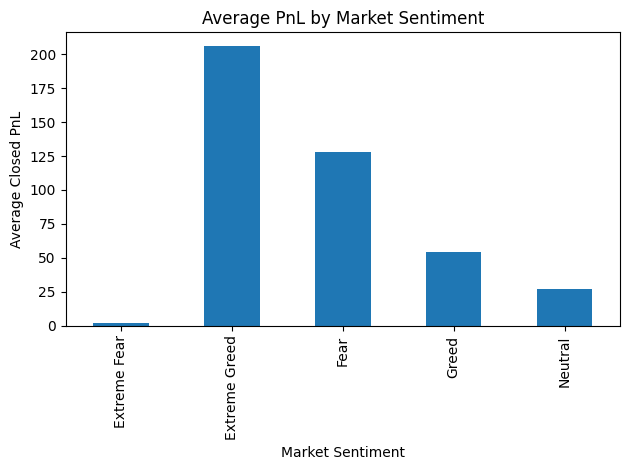

In [55]:
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()

plt.figure()
pnl_by_sentiment.plot(kind='bar')
plt.title('Average PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('outputs/pnl_vs_sentiment.png')
plt.show()


This comparison highlights how average profitability differs between
Fear and Greed market regimes.


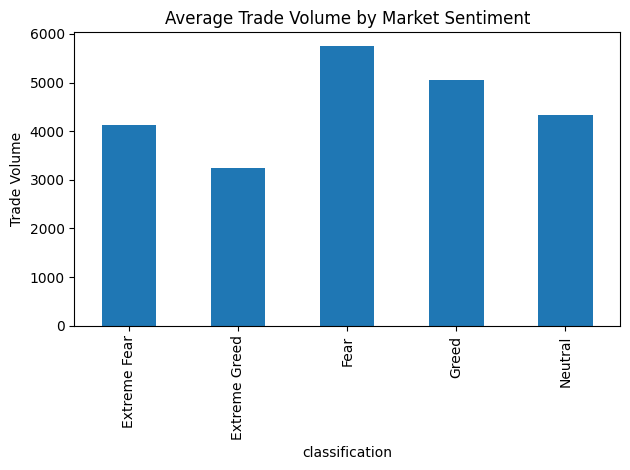

In [61]:
merged_df.groupby('classification')['trade_volume'].mean().plot(kind='bar')
plt.title('Average Trade Volume by Market Sentiment')
plt.ylabel('Trade Volume')
plt.tight_layout()
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()


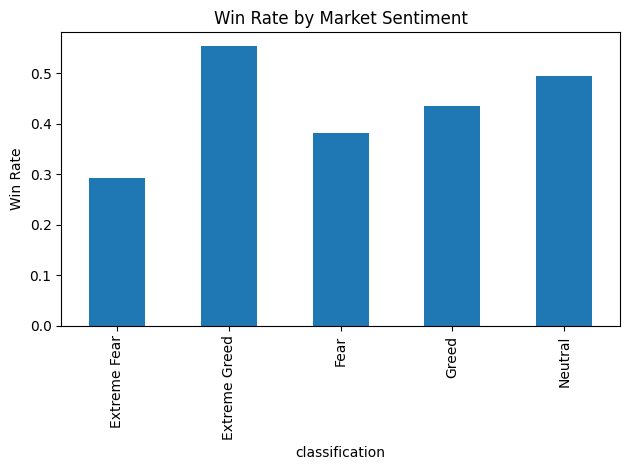

In [63]:
merged_df.groupby('classification')['is_profitable'].mean().plot(kind='bar')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.tight_layout()
plt.savefig('outputs/winrate_fear_vs_greed.png')
plt.show()

Win rate captures execution quality and decision-making effectiveness
across market emotions.

In [64]:
trades_df.to_csv('csv_files/cleaned_trades.csv', index=False)
merged_df.to_csv('csv_files/sentiment_merged.csv', index=False)

In [67]:
print(trades_df.columns)
print(sentiment_df.columns)
print(trades_df['Timestamp IST'].dtype)
print(sentiment_df['date'].dtype)
merged_df['classification'].value_counts(dropna=False)
merged_df[['Closed PnL', 'trade_volume']].isna().sum()
import os
os.listdir('outputs')
os.listdir('csv_files')


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'time', 'is_profitable', 'trade_volume',
       'side_numeric'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
object
object


['cleaned_trades.csv', 'sentiment_merged.csv']

In [72]:
print("Analysis completed successfully.")

Analysis completed successfully.
